In [1]:
# import necessary libraries for data analysis and visulization
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mpld3

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [139]:
allteam_overall_box_2019_20 = pd.read_csv('allteam_overall_box_2019_20.csv')
test = allteam_overall_box_2019_20.groupby('TEAM_NAME_x').mean()

In [151]:
nba_teams = pd.read_csv('nba_teams.csv')
nba_teams = nba_teams.sort_values(by='full_name')
playoff_team_name = ['BOS','DAL','DEN','HOU','LAC','LAL','MIA','MIL','IND','PHI','OKC','TOR','UTA']
playoff_teams = nba_teams[nba_teams['abbreviation'].isin(playoff_team_name)]
playoff_teams = playoff_teams.reset_index(drop=True)
playoff_teams

,Unnamed: 0,id,full_name,abbreviation,nickname,city,state,year_founded
0,1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
1,5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
2,6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
3,8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
4,17,1610612754,Indiana Pacers,IND,Pacers,Indiana,Indiana,1976
5,9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970
6,10,1610612747,Los Angeles Lakers,LAL,Lakers,Los Angeles,California,1948
7,11,1610612748,Miami Heat,MIA,Heat,Miami,Florida,1988
8,12,1610612749,Milwaukee Bucks,MIL,Bucks,Milwaukee,Wisconsin,1968
9,23,1610612760,Oklahoma City Thunder,OKC,Thunder,Oklahoma City,Oklahoma,1967


In [152]:
nba_teams

,Unnamed: 0,id,full_name,abbreviation,nickname,city,state,year_founded
0,0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
14,14,1610612751,Brooklyn Nets,BKN,Nets,Brooklyn,New York,1976
29,29,1610612766,Charlotte Hornets,CHA,Hornets,Charlotte,North Carolina,1988
4,4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
2,2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
5,5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
28,28,1610612765,Detroit Pistons,DET,Pistons,Detroit,Michigan,1948
7,7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


### Use of KMeans Clustering model to devide teams into groups

#### Based on Offensive Rating, Defensive rating, Net Rating and Pace

In [40]:
features = ['OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PACE']
off_rating_mean = test['OFF_RATING'].mean() * np.ones(2)
def_rating_mean = test['DEF_RATING'].mean() * np.ones(2)

# set number of clusters
kclusters = 7
test_off_def = test[features].round(2)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(test_off_def)

# add cluster labels generated for each row in the dataframe
test_off_def.insert(0, 'Team Labels', kmeans.labels_)

#### Based on 3PT Attempts, Field Goal Percentage and Ratio

In [153]:
# add column '%FG3A', ratio of 3PT attemps of all field goal attempt
test['%FG3A'] = test['FG3A'] / test['FGA']

features = ['OFF_RATING','%FG3A','FG3M','FG3A','FG3_PCT']
off_rating_mean = test['OFF_RATING'].mean() * np.ones(2)
fg3a_mean = test['FG3A'].mean() * np.ones(2)

# set number of clusters
kclusters = 6
test_3pt = test[features].round(2)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(test_3pt)

# check cluster labels generated for each row in the dataframe
test_3pt.insert(0, 'Team Labels', kmeans.labels_)
test_3pt.insert(0, 'Team Abbreviation', nba_teams.abbreviation.tolist())
# pick only playoffs team for comparison
test_3pt

,Team Abbreviation,Team Labels,OFF_RATING,%FG3A,FG3M,FG3A,FG3_PCT
TEAM_NAME_x,,,,,,,
Atlanta Hawks,ATL,0,105.96,0.40,11.75,35.51,0.33
Boston Celtics,BOS,2,112.54,0.38,12.33,33.91,0.37
Brooklyn Nets,BKN,0,107.29,0.41,12.72,37.33,0.34
Charlotte Hornets,CHA,0,105.77,0.40,11.93,34.40,0.34
Chicago Bulls,CHI,0,105.10,0.40,12.11,35.16,0.34
Cleveland Cavaliers,CLE,4,106.32,0.36,11.13,32.00,0.34
Dallas Mavericks,DAL,3,116.58,0.46,15.22,41.04,0.37
Denver Nuggets,DEN,1,112.11,0.34,10.91,30.58,0.35
Detroit Pistons,DET,1,108.83,0.37,11.81,32.09,0.37


#### Clustering Results Visualization

In [60]:
# New figure
fig1 = plt.figure(figsize=(16,8))

# Offense vs. Defense Plot
ax1 = fig1.add_subplot(121)

# Set marker size as Pace
markersize = (test['PACE']-93)**3

# Scatter plot Defensive_Rating vs. Offensive_Rating
scatter1 = ax1.scatter(test_off_def['OFF_RATING'], test_off_def['DEF_RATING'], \
                      c=test_off_def['Team Labels'],cmap='rainbow', s=markersize, alpha=0.8)

# Draw average rating and net rating line
ax1.plot(np.linspace(0,200,num=2), def_rating_mean, linestyle='dashed', label='Avg Def Rating')
ax1.plot(off_rating_mean, np.linspace(0,200,num=2), linestyle='dashed', label='Avg Off Rating')
ax1.plot(np.linspace(0,200,num=2),np.linspace(0,200,num=2), linestyle='dashed', label='Net Rating = 0')

# Set axis range and label
ax1.set_ylim(98,120)
ax1.set_xlim(102,118)
ax1.set_xlabel('Offensive Rating', fontsize='16')
ax1.set_ylabel('Defensive Rating', fontsize='16')
ax1.set_title('Offense vs. Defense', fontsize='22')

# produce a legend with the unique colors from the scatter
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower left", title="Classes", fontsize='12')
ax1.add_artist(legend1)

# produce a legend with line plot
legend2 = ax1.legend(loc='upper right', fontsize='12')

# add annotations of bad/good o/f
at1 = AnchoredText("Bad O Bad D",prop=dict(size=15), loc='upper left')
at2 = AnchoredText("Good O Good D",prop=dict(size=15), loc='lower right')
ax1.add_artist(at1)
ax1.add_artist(at2)

# plt.show()

# Set labels as Team_Name and Net_Rating for mpld3 
label1 = test_off_def.index.tolist()
label2 = test_off_def.NET_RATING.tolist()
labels = []
for i in list(range(len(label1))):
    labels.append(label1[i]+','+str(label2[i]))
# set picks 
tooltip = mpld3.plugins.PointLabelTooltip(scatter1, labels=labels)
mpld3.plugins.connect(fig1, tooltip)

mpld3.display()

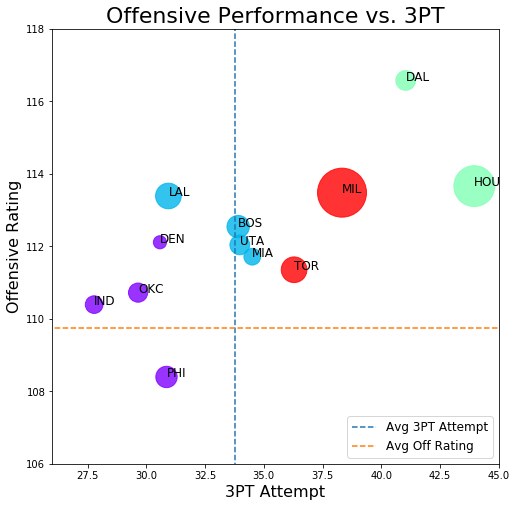

,Unnamed: 0,TEAM_ID,GAME_ID,MIN_x,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,%FG3A
TEAM_NAME_x,,,,,,,,,,,,,,,,,,,,,
Boston Celtics,83.5,1.610613e+09,2.190042e+07,48.277778,41.240741,89.166667,0.463315,12.333333,33.907407,0.365167,...,0.532426,0.571185,1.0,0.198296,101.861111,99.951111,83.292593,100.537037,0.534352,0.380270
Dallas Mavericks,303.0,1.610613e+09,2.190042e+07,48.272727,41.472727,89.818182,0.462055,15.218182,41.036364,0.371218,...,0.546545,0.582455,1.0,0.197927,100.841091,99.308727,82.757091,99.981818,0.522436,0.456883
Denver Nuggets,358.0,1.610613e+09,2.190043e+07,48.545455,41.654545,89.618182,0.466000,10.909091,30.581818,0.352309,...,0.527218,0.560091,1.0,0.198145,99.605818,97.576000,81.313455,98.618182,0.521836,0.341246
Houston Rockets,469.0,1.610613e+09,2.190042e+07,48.181818,41.127273,90.890909,0.453491,15.381818,43.963636,0.351236,...,0.538582,0.579236,1.0,0.197673,106.097455,103.867455,86.555273,104.327273,0.497727,0.483697
Indiana Pacers,959.0,1.610613e+09,2.190041e+07,48.363636,42.290909,88.490909,0.479436,10.163636,27.781818,0.365127,...,0.537073,0.568200,1.0,0.198091,100.595091,98.784727,82.321091,99.545455,0.520127,0.313951
Los Angeles Lakers,578.0,1.610613e+09,2.190040e+07,48.188679,43.113208,88.339623,0.487566,11.245283,30.943396,0.361642,...,0.551283,0.580698,1.0,0.197642,102.922453,100.698679,83.915849,101.169811,0.550547,0.350278
Miami Heat,632.0,1.610613e+09,2.190042e+07,48.727273,39.600000,84.763636,0.468236,12.981818,34.509091,0.377545,...,0.544982,0.584655,1.0,0.197836,100.391273,98.548182,82.123636,100.181818,0.522127,0.407121
Milwaukee Bucks,687.0,1.610613e+09,2.190041e+07,48.090909,43.927273,91.381818,0.482164,13.818182,38.327273,0.361491,...,0.557982,0.587018,1.0,0.198200,107.204364,105.389818,87.825091,105.563636,0.573127,0.419419
Oklahoma City Thunder,1290.0,1.610613e+09,2.190042e+07,48.363636,40.181818,85.290909,0.471836,10.490909,29.654545,0.352073,...,0.533618,0.576436,1.0,0.198400,100.818000,99.168182,82.640364,99.927273,0.526182,0.347687


In [157]:
test_3pt = test_3pt[test_3pt.index.isin(playoff_teams['full_name'])]
test1 = test[test.index.isin(playoff_teams['full_name'])]

# Offense vs. 3PT Plot
# ax2 = fig1.add_subplot(122)
fig2, ax2 = plt.subplots(figsize=(8,8))

# Set marker size as Pace
markersize = (test1['PACE']-92)**3

# Scatter plot Defensive_Rating vs. Offensive_Rating
scatter2 = ax2.scatter(test_3pt['FG3A'], test1['OFF_RATING'], \
                      c=test_3pt['Team Labels'], cmap='rainbow', s=markersize, alpha=0.8)

# Draw average rating and net rating line
ax2.plot(fg3a_mean, np.linspace(0,200,num=2), linestyle='dashed', label='Avg 3PT Attempt')
ax2.plot(np.linspace(0,200,num=2), off_rating_mean, linestyle='dashed', label='Avg Off Rating')

# produce a legend with line plot
legend2 = ax2.legend(loc='lower right', fontsize='12')

# Set axis range and label
ax2.set_ylim(106,118)
ax2.set_xlim(26,45)
ax2.set_xlabel('3PT Attempt', fontsize='16')
ax2.set_ylabel('Offensive Rating', fontsize='16')
ax2.set_title('Offensive Performance vs. 3PT', fontsize='22')

# add label for each point
for i,k in enumerate(test_3pt['Team Abbreviation']):
    x = test_3pt['FG3A'][i]
    y = test1['OFF_RATING'][i]
    plt.text(x, y, k, fontsize=12)
    
plt.show()